In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df1 = pd.read_excel("C:/Users/gvrk1/Downloads/Dropout Tracker project/2020_2021_DR.xlsx")

In [68]:
df2 = pd.read_excel("C:/Users/gvrk1/Downloads/Dropout Tracker project/2022_2023_DR.xlsx")

In [69]:
df3 = pd.read_excel("C:/Users/gvrk1/Downloads/Dropout Tracker project/2023_2024_DR.xlsx")

In [70]:
data = pd.concat([df1, df2, df3], ignore_index=True)

In [91]:
data.to_excel("Final_Dropout_Data.xlsx", index=False)


In [71]:
# 1. Check first few rows
print(data.head())

   S.NO     State    Level Gender  Dropout Rate Academic year
0     1     India  Primary   Boys           0.8     2020-2021
1     2   Haryana  Primary  Girls           2.1     2020-2021
2     3   Haryana  Primary   Boys           2.2     2020-2021
3     4  Nagaland  Primary   Boys           6.6     2020-2021
4     5  Nagaland  Primary  Girls           5.2     2020-2021


In [72]:
# 2. Shape of the data
print("Shape:", data.shape)

Shape: (666, 6)


In [73]:
# 3. Column names
print("Columns:", data.columns.tolist())

Columns: ['S.NO', 'State', 'Level', 'Gender', 'Dropout Rate', 'Academic year']


In [74]:
# 4. Data types
print("\nData Types:\n", data.dtypes)


Data Types:
 S.NO               int64
State             object
Level             object
Gender            object
Dropout Rate     float64
Academic year     object
dtype: object


In [75]:
# 5. Missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 S.NO             0
State            0
Level            0
Gender           0
Dropout Rate     0
Academic year    0
dtype: int64


In [76]:
# 6. Unique values in categorical columns
print("\nLevels:", data['Level'].unique())
print("Genders:", data['Gender'].unique())
print("Academic Years:", data['Academic year'].unique())


Levels: ['Primary' 'Upper Primary' 'Secondary']
Genders: ['Boys' 'Girls']
Academic Years: ['2020-2021' '2022-2023' '2023-2024']


In [77]:
# 7. Summary of dropout rate
print("\nDropout Rate Stats:\n", data['Dropout Rate'].describe())


Dropout Rate Stats:
 count    666.000000
mean       7.059760
std        7.275006
min        0.000000
25%        1.200000
50%        4.900000
75%       10.900000
max       32.600000
Name: Dropout Rate, dtype: float64


In [78]:
# 8. Duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


## 1. 📉 Dropout Rate Trend Across Academic Years

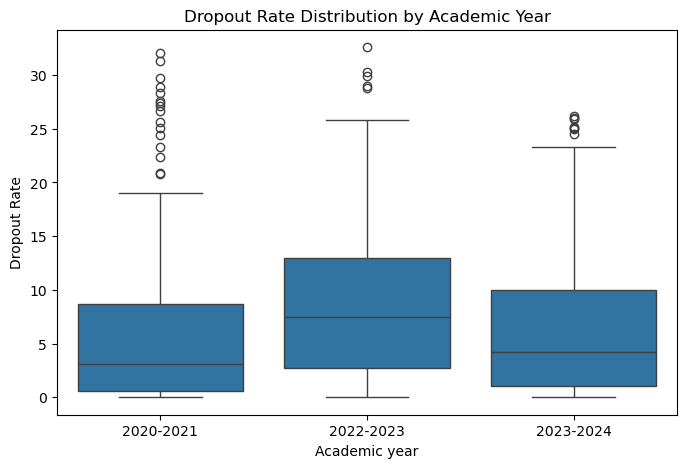

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Academic year', y='Dropout Rate', data=data)
plt.title("Dropout Rate Distribution by Academic Year")
plt.show()

## 2. Average Dropout Rate by Education Level

C:\Users\gvrk1\AppData\Local\Temp\ipykernel_26032\3996114843.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Level', y='Dropout Rate', data=data, estimator='mean', ci=None)


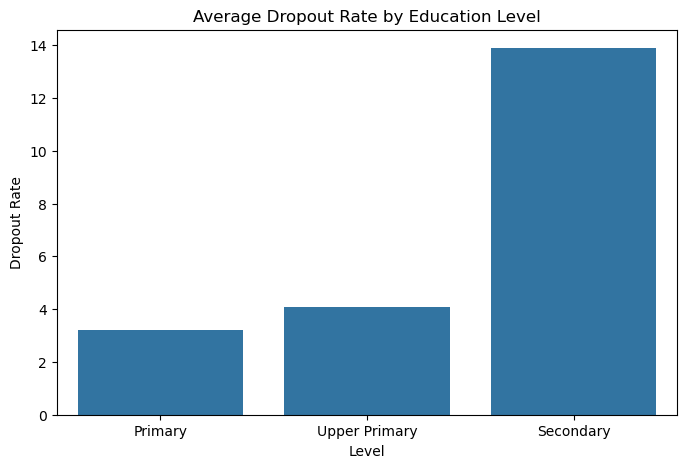

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Level', y='Dropout Rate', data=data, estimator='mean', ci=None)
plt.title("Average Dropout Rate by Education Level")
plt.show()

## 3. Dropout Rate by Gender

C:\Users\gvrk1\AppData\Local\Temp\ipykernel_26032\3179086620.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Dropout Rate', data=data, estimator='mean', ci=None)


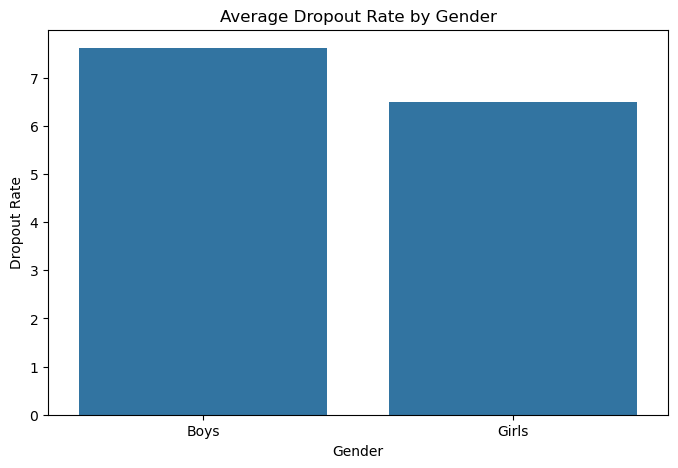

In [83]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Dropout Rate', data=data, estimator='mean', ci=None)
plt.title("Average Dropout Rate by Gender")
plt.show()

## 4. Top 10 States with Highest Dropout (Latest Year)

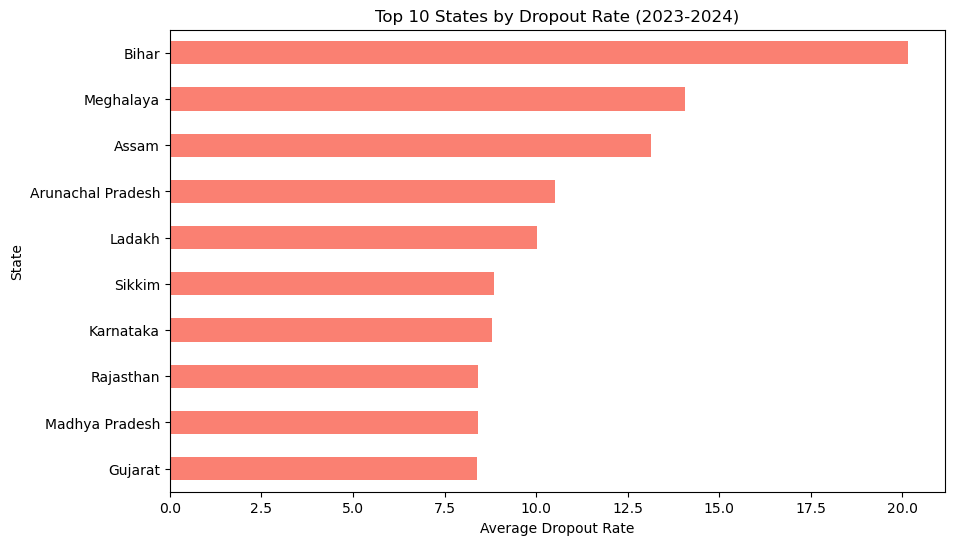

In [84]:
latest_year = data['Academic year'].max()
top_states = data[data['Academic year'] == latest_year].groupby('State')['Dropout Rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_states.plot(kind='barh', color='salmon')
plt.xlabel('Average Dropout Rate')
plt.title(f'Top 10 States by Dropout Rate ({latest_year})')
plt.gca().invert_yaxis()
plt.show()

## 1. Dropout Rate Trends by Level Across Years
-- Helps understand if dropout is increasing/decreasing over time for each level (Primary, Secondary, etc.).

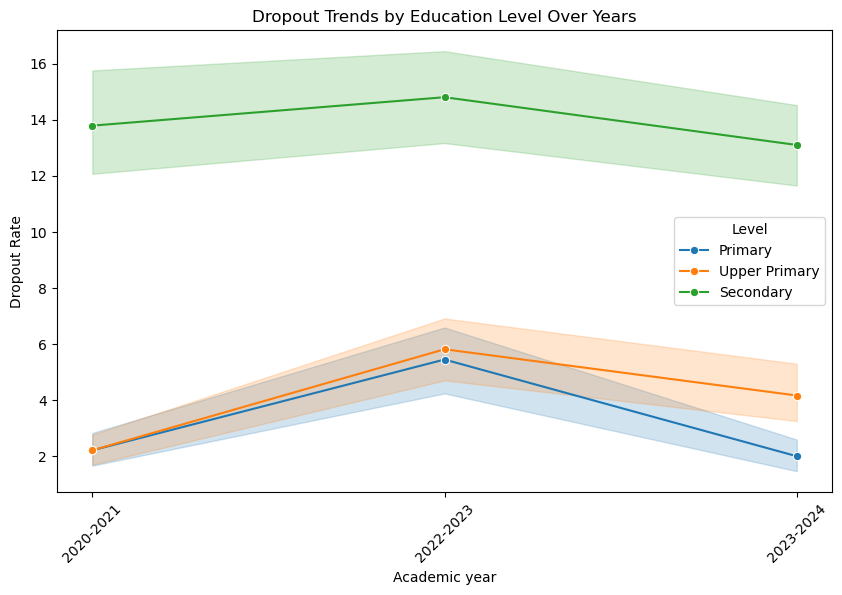

In [85]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Academic year', y='Dropout Rate', hue='Level', marker='o')
plt.title('Dropout Trends by Education Level Over Years')
plt.xticks(rotation=45)
plt.show()

## 2. Dropout Rate by Gender Across Years (Split by Level)
-- This will show if girls/boys are dropping out more at each level.

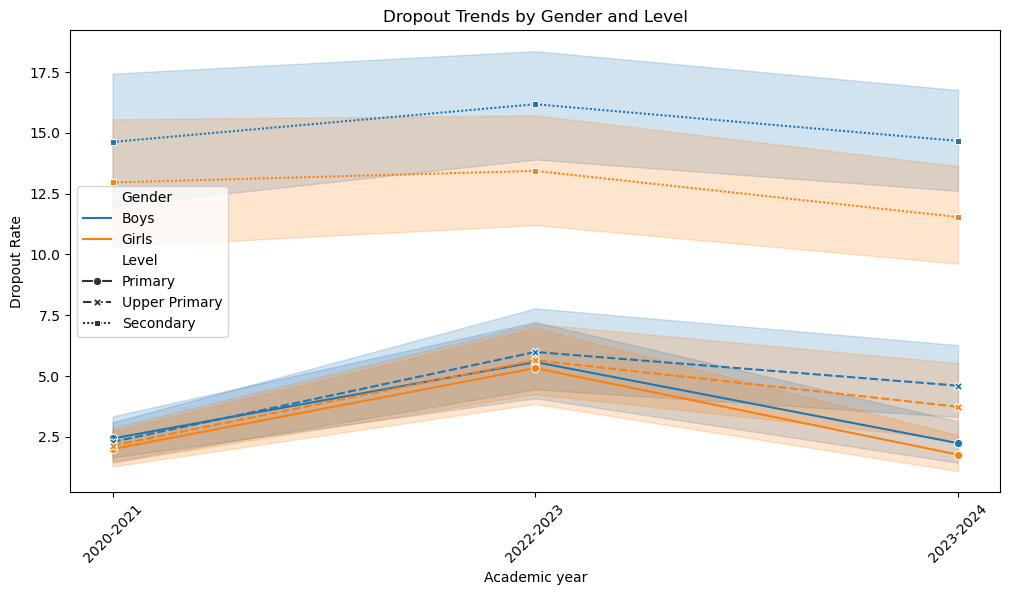

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Academic year', y='Dropout Rate', hue='Gender', style='Level', markers=True)
plt.title('Dropout Trends by Gender and Level')
plt.xticks(rotation=45)
plt.show()

## 3. Missing Value Heatmap (Just for Check)

## 4.Correlation between Level, Gender and Dropout Rate

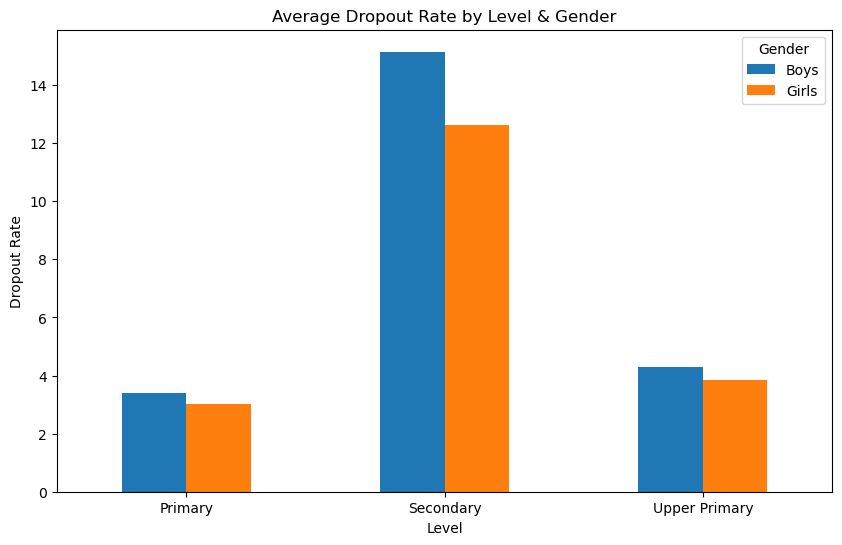

In [89]:
data.groupby(['Level', 'Gender'])['Dropout Rate'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title("Average Dropout Rate by Level & Gender")
plt.ylabel("Dropout Rate")
plt.xticks(rotation=0)
plt.show()

## 5. Best vs Worst Performing States
-- To show policy-focused insight.

In [90]:
state_avg = data.groupby('State')['Dropout Rate'].mean().sort_values()

# Best 5
print("✅ Best Performing States (Lowest Avg Dropout):")
print(state_avg.head())

# Worst 5
print("\n🚨 Worst Performing States (Highest Avg Dropout):")
print(state_avg.tail())

✅ Best Performing States (Lowest Avg Dropout):
State
Chandigarh                     0.705556
Kerala                         2.455556
Andaman and Nicobar Islands    2.555556
Himachal Pradesh               2.888889
Tamil Nadu                     3.077778
Name: Dropout Rate, dtype: float64

🚨 Worst Performing States (Highest Avg Dropout):
State
Arunachal Pradesh    11.155556
Mizoram              11.861111
Assam                14.050000
Bihar                15.205556
Meghalaya            16.211111
Name: Dropout Rate, dtype: float64
